In [ ]:
# example of a CNN model with an identity or projection residual module
# Example of creating a CNN model with a VGG block
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.layers import Activation

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import add
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PRML

/content/drive/MyDrive/PRML


In [ ]:
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters, strides=(1,1)):
  bn_axis = 3
  conv1 = Conv2D(n_filters, (3,3), strides=strides, padding='same', kernel_initializer='he_normal')(layer_in)
  conv1a = BatchNormalization(axis=bn_axis)(conv1)
  conv1a = Activation('relu')(conv1a)
  # conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', kernel_initializer='he_normal')(conv1a)
  conv2 = BatchNormalization(axis=bn_axis)(conv2)
  if strides==(1,1):
    conv2 = add([layer_in, conv2])
  else:
    conv2 = add([conv1, conv2])
  conv2 = Activation('relu')(conv2)
  return conv2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()

In [ ]:
# load train data
train = imagegen.flow_from_directory("/content/drive/MyDrive/PRML/imagenette2-160/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 9469 images belonging to 10 classes.


In [ ]:
# load val data
val = imagegen.flow_from_directory("/content/drive/MyDrive/PRML/imagenette2-160/val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))


Found 3925 images belonging to 10 classes.


In [ ]:
## Resnet with layer = 18

visible = Input(shape=(224, 224, 3))

layer = Conv2D(64, (7,7),strides=(2, 2),  padding='same')(visible)
layer = BatchNormalization()(layer)
layer = layers.Activation(activations.relu)(layer)
layer = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(layer)
layer = BatchNormalization()(layer)
layer = layers.Activation(activations.relu)(layer)


layer =  residual_module(layer, 64)
layer = residual_module(layer, 64)


layer = residual_module(layer, 128, strides=(2,2))
layer = residual_module(layer, 128)


layer = residual_module(layer, 256, strides=(2,2))
layer = residual_module(layer, 256)


layer = residual_module(layer, 512, strides=(2,2))
layer = residual_module(layer, 512)


layer = GlobalAveragePooling2D()(layer)
layer = Dense(10, activation='softmax')(layer)


In [ ]:
# create model
model = Model(inputs=visible, outputs=layer)

In [ ]:
# summarize model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 112, 112, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
## Resnet with layer = 34

layer_34 = Conv2D(64, (7,7),strides=(2, 2),  padding='same')(visible)
layer_34 = BatchNormalization()(layer_34)
layer_34 = layers.Activation(activations.relu)(layer_34)
layer_34 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(layer_34)
layer_34 = BatchNormalization()(layer_34)
layer_34 = layers.Activation(activations.relu)(layer_34)


layer_34 =  residual_module(layer_34, 64)
layer_34 = residual_module(layer_34, 64)
layer_34 = residual_module(layer_34, 64)


layer_34 = residual_module(layer_34, 128, strides=(2,2))
layer_34 = residual_module(layer_34, 128)
layer_34 = residual_module(layer_34, 128)
layer_34 = residual_module(layer_34, 128)


layer_34 = residual_module(layer_34, 256, strides=(2,2))
layer_34 = residual_module(layer_34, 256)
layer_34 = residual_module(layer_34, 256)
layer_34 = residual_module(layer_34, 256)
layer_34 = residual_module(layer_34, 256)
layer_34 = residual_module(layer_34, 256)


layer_34 = residual_module(layer_34, 512, strides=(2,2))
layer_34 = residual_module(layer_34, 512)
layer_34 = residual_module(layer_34, 512)



layer_34 = GlobalAveragePooling2D()(layer_34)
layer_34 = Dense(10, activation='softmax')(layer_34)

In [ ]:
# create model
model_2 = Model(inputs=visible, outputs=layer_34)

In [ ]:
# summarize model
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 112, 112, 64) 256         conv2d_17[0][0]                  
__________________________________________________________________________________________________
tf.nn.relu_2 (TFOpLambda)       (None, 112, 112, 64) 0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [ ]:
opt = SGD(learning_rate=0.1, momentum=0.9)

In [ ]:
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
#trainX = model.predict(train)
#testX = model.predict(val)

In [ ]:
#trainY = to_categorical(train.labels)
#testY = to_categorical(val.labels)

In [ ]:
epoch =80

In [ ]:
 #history = model.fit_generator(train, epochs=epoch, validation_data=val)

In [ ]:
#history = model.fit(trainX, trainY, epochs=epoch, batch_size=128, validation_data=(testX, testY), verbose=1)
#history = model.fit_generator(train, epochs=epoch, validation_data=val)


In [ ]:
import numpy as np
#loss_history = (1-np.array(history.history['accuracy']))*100
#loss_history_test = (1-np.array(history.history['val_accuracy']))*100
#numpy_loss_history = np.array(loss_history)
#numpy_loss_history_test = np.array(loss_history_test)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history_imagenet1.csv", numpy_loss_history)
#np.savetxt("/content/drive/MyDrive/PRML/loss_history_imagenet2.csv", numpy_loss_history_test)

In [ ]:
#pyplot.plot((1-np.array(history.history['accuracy']))*100,'g-', label='train 18-layer')
#pyplot.plot((1-np.array(history.history['val_accuracy']))*100,'g--', label='test 18-layer')
#pyplot.xlabel('Epoch',fontsize=12)
#pyplot.ylabel('Error(%)',fontsize=12)
#pyplot.legend()
#pyplot.grid(color='y')
#pyplot.figure(1,dpi=120)
#pyplot.show()

In [ ]:
model_2.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [ ]:
#trainX_2 = model_2.predict(train)
#testX_2 = model_2.predict(val)

In [ ]:
#trainY_2 = to_categorical(train.labels)
#testY_2 = to_categorical(val.labels)

In [ ]:
history_2 = model_2.fit_generator(train, epochs=epoch, validation_data=val)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
74/74 [==============================] - 4693s 63s/step - loss: 0.1762 - accuracy: 0.0978 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 2/80
74/74 [==============================] - 55s 735ms/step - loss: 0.1747 - accuracy: 0.1264 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 3/80
74/74 [==============================] - 55s 748ms/step - loss: 0.1865 - accuracy: 0.0677 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 4/80
74/74 [==============================] - 57s 763ms/step - loss: 0.1911 - accuracy: 0.0446 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 5/80
74/74 [==============================] - 57s 775ms/step - loss: 0.1797 - accuracy: 0.1014 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 6/80
74/74 [==============================] - 58s 781ms/step - loss: 0.1645 - accuracy: 0.1775 - val_loss: 0.1818 - val_accuracy: 0.0910
Epoch 7/80
74/74 [==============================] - 58s 779ms/step - loss: 0.1840 - accuracy: 0.0802 - val_loss: 0.1818 - val_accuracy: 0.0910

In [ ]:
loss_history_2 = (1-np.array(history_2.history['accuracy']))*100
loss_history_test_2 = (1-np.array(history_2.history['val_accuracy']))*100
numpy_loss_history_2 = np.array(loss_history_2)
numpy_loss_history_test_2 = np.array(loss_history_test_2)
np.savetxt("/content/drive/MyDrive/PRML/loss_history_imagenet_34layer_1.csv", numpy_loss_history_2)
np.savetxt("/content/drive/MyDrive/PRML/loss_history_imagenet_34layer_2.csv", numpy_loss_history_test_2)

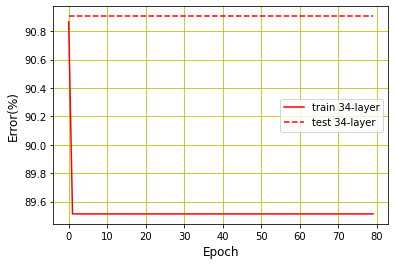

In [ ]:
pyplot.plot((1-np.array(history_2.history['accuracy']))*100,'r-', label='train 34-layer')
pyplot.plot((1-np.array(history_2.history['val_accuracy']))*100,'r--', label='test 34-layer')
pyplot.xlabel('Epoch',fontsize=12)
pyplot.ylabel('Error(%)',fontsize=12)
pyplot.legend()
pyplot.grid(color='y')
pyplot.figure(1,dpi=120)
pyplot.show()

In [ ]:
# plot diagnostic learning curves
import numpy as np
def summarize_diagnostics(history,history_2):
  pyplot.title('Error')
  
  pyplot.plot((1-np.array(history.history['accuracy']))*100,'g-', label='train 18-layer')
  #pyplot.plot((1-np.array(history.history['val_accuracy']))*100,'g--', label='test 18-layer')
  pyplot.plot((1-np.array(history_2.history['accuracy']))*100,'r-', label='train 34-layer')
  #pyplot.plot((1-np.array(history_2.history['val_accuracy']))*100,'r--', label='test 34-layer')     
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  #pyplot.savefig(filename + '_plot.png')
  pyplot.xlabel('Epoch',fontsize=12)
  pyplot.ylabel('Error(%)',fontsize=12)
  pyplot.legend()
  pyplot.grid(color='y')
  pyplot.figure(1,dpi=120)
  pyplot.show()

In [ ]:
#summarize_diagnostics(history,history_2)

NameError: ignored